<a href="https://colab.research.google.com/github/Anekdoran/PIA/blob/main/PIA05_Guia_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de clasificación de imágenes basado en una red neuronal profunda

Se pide utilizar el dataset que viene precargado en la librería Keras: [CIFAR10](https://keras.io/api/datasets/cifar10/)


1. Importa los módulos necesarios de la librería Keras. Sugerencia:


```
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense
```



In [14]:
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.utils import to_categorical


2. Importa el dataset CIFAR10 de Keras, en un conjunto de datos de entrenamiento y un conjunto de datos para test. Sugerencia:


```
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```



In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


3. Explora los datos, especialmente, las dimensiones del dataset. Aplica normalización a los datos de entrada y la técnica one-hot encoding a los de salida.

*Sugerencia para normalizar:*


```
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
```
*Sugerencia de aplicación one-hot encoding para categorizar etiquetas:*


```
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
```




In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

4. Crea un modelo basado en redes neuronales profundas que tenga más de una capa de tipo Dense (Keras). Si es necesario, usa la capa Flatten al principio. Prueba un primer modelo lo más sencillo posible.

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Definir el modelo secuencial
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanar la entrada (por ejemplo, imágenes de 28x28)
    layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y activación ReLU
    layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (para clasificación)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

5. Configura el entrenamiento utilizando la función compile, con la función loss = 'categorical_crossentropy' y el optimizador Adam. Utiliza la función fit para entrenar el modelo, inicialmente, con 20 epochs.

In [22]:
# Cargar el conjunto de datos MNIST
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar datos y dividir en entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los valores de píxeles a un rango de 0 a 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Entrenar el modelo
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=20)

# Resumen del modelo
model.summary()


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9961 - loss: 0.0118 - val_accuracy: 0.9823 - val_loss: 0.0921
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9960 - loss: 0.0129 - val_accuracy: 0.9818 - val_loss: 0.0987
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9966 - loss: 0.0107 - val_accuracy: 0.9777 - val_loss: 0.1188
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9963 - loss: 0.0114 - val_accuracy: 0.9830 - val_loss: 0.1035
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9975 - loss: 0.0088 - val_accuracy: 0.9803 - val_loss: 0.1058
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9978 - loss: 0.0074 - val_accuracy: 0.9832 - val_loss: 0.1115
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9972 - loss: 0.0087 - val_accuracy: 0.9825 - val_loss: 0.1003
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9972 - loss: 0

KeyboardInterrupt: 

6. Crea un nuevo modelo con más capas y mayor número de neuronas. Entrénalo utilizando un número mayor de epochs y analiza el resultado. ¿Has conseguido mejorar la precisión? haz varias pruebas y quédate con el modelo que mejores resultados da.

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Definir el modelo secuencial con más capas y más neuronas
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar la entrada (por ejemplo, imágenes de 28x28)
    Dense(256, activation='relu'),  # Capa oculta con 256 neuronas y activación ReLU
    Dense(128, activation='relu'),  # Otra capa oculta con 128 neuronas y activación ReLU
    Dense(64, activation='relu'),  # Otra capa oculta con 64 neuronas y activación ReLU
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (para clasificación)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo con un mayor número de epochs
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8934 - loss: 0.3588 - val_accuracy: 0.9599 - val_loss: 0.1284
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9704 - loss: 0.0948 - val_accuracy: 0.9681 - val_loss: 0.1003
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9801 - loss: 0.0636 - val_accuracy: 0.9775 - val_loss: 0.0742
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9836 - loss: 0.0494 - val_accuracy: 0.9761 - val_loss: 0.0765
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9885 - loss: 0.0371 - val_accuracy: 0.9756 - val_loss: 0.0835
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9898 - loss: 0.0296 - val_accuracy: 0.9760 - val_loss: 0.0912
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9911 - loss: 0.0276 - val_accuracy: 0.9763 - val_loss: 0.0842
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9931 - loss: 0

7. Utiliza el método evaluate para ver la precisión que se alcanzaría con datos nuevos, aplicándolo al conjunto de datos de test. ¿Es muy diferente a la precisión alcanzada en el entrenamiento?

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Definir el modelo secuencial con más capas y más neuronas
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar la entrada (por ejemplo, imágenes de 28x28)
    Dense(256, activation='relu'),  # Capa oculta con 256 neuronas y activación ReLU
    Dense(128, activation='relu'),  # Otra capa oculta con 128 neuronas y activación ReLU
    Dense(64, activation='relu'),  # Otra capa oculta con 64 neuronas y activación ReLU
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (para clasificación)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo con un mayor número de epochs
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Precisión en datos de prueba: {test_accuracy:.4f}')



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8886 - loss: 0.3723 - val_accuracy: 0.9608 - val_loss: 0.1244
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9709 - loss: 0.0950 - val_accuracy: 0.9749 - val_loss: 0.0798
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9802 - loss: 0.0593 - val_accuracy: 0.9711 - val_loss: 0.0970
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9844 - loss: 0.0478 - val_accuracy: 0.9773 - val_loss: 0.0784
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9877 - loss: 0.0389 - val_accuracy: 0.9786 - val_loss: 0.0745
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9908 - loss: 0.0278 - val_accuracy: 0.9782 - val_loss: 0.0834
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9920 - loss: 0.0261 - val_accuracy: 0.9762 - val_loss: 0.0877
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9922 - loss: 0

8. Explora de forma visual la precisión que se consigue, representando las primeras 25 imágenes del conjunto de datos de test, y comparando la etiqueta real con la de la predicción. Aquí tienes una posible forma de hacerlo (recuerda poner el nombre de tu modelo a la hora de aplicar el método predict):


```
predictions = model.predict(X_test)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)
```



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


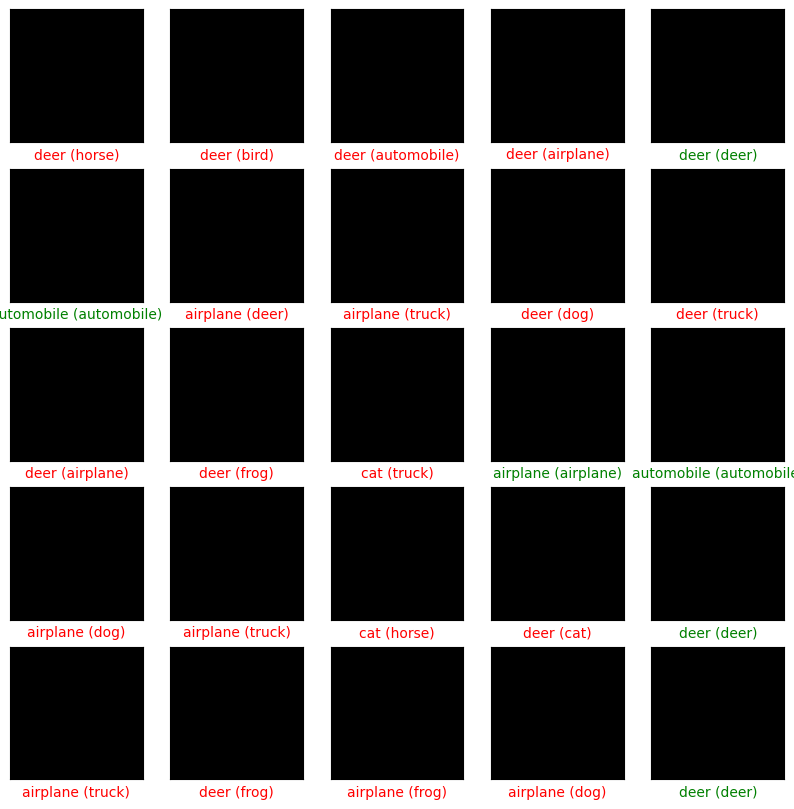

In [34]:
predictions = model.predict(X_test)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)
